# Get Dow Jones 30 list from Wikipedia

-----------

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

-----------------------
## 1. Get and clean data

### Get Dow Jones list from wikipedia

In [2]:
url= "https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average"
tables= pd.read_html(url, match= r'Symbol')

# There should be only one table.
print(len(tables))

1


In [3]:
dj30= tables[0]
dj30.head()

,Company,Exchange,Symbol,Industry,Date added,Notes,Index weighting
0,3M,NYSE,MMM,Conglomerate,1976-08-09,As Minnesota Mining and Manufacturing,2.88%
1,American Express,NYSE,AXP,Financial services,1982-08-30,NaN,3.56%
2,Amgen,NASDAQ,AMGN,Biopharmaceutical,2020-08-31,NaN,4.88%
3,Apple,NASDAQ,AAPL,Information technology,2015-03-19,NaN,3.15%
4,Boeing,NYSE,BA,Aerospace and defense,1987-03-12,NaN,3.40%


### Clean columns

In [4]:
dj30.rename(columns= {'Company':'name', 'Symbol':'ticker', 'Industry':'industry', 'Date added': 'date_added', 'Exchange': 'exchg', 'Index weighting':'weight'}, inplace= True)
dj30['weight']= dj30['weight'].str.replace('%', '')
dj30.drop(columns= {'Notes'}, inplace= True)

In [5]:
dj30.head()

,name,exchg,ticker,industry,date_added,weight
0,3M,NYSE,MMM,Conglomerate,1976-08-09,2.88
1,American Express,NYSE,AXP,Financial services,1982-08-30,3.56
2,Amgen,NASDAQ,AMGN,Biopharmaceutical,2020-08-31,4.88
3,Apple,NASDAQ,AAPL,Information technology,2015-03-19,3.15
4,Boeing,NYSE,BA,Aerospace and defense,1987-03-12,3.40


In [6]:
dj30['weight']= dj30['weight'].astype(str).astype(float)

In [7]:
dj30.dtypes

name           object
exchg          object
ticker         object
industry       object
date_added     object
weight        float64
dtype: object

------------------
## 2. Navigate data

### Check distribution by stock exchange

In [8]:
dj30.groupby('exchg')[['ticker']].count().sort_values('ticker', ascending= False)

,ticker
exchg,
NYSE,23
NASDAQ,7


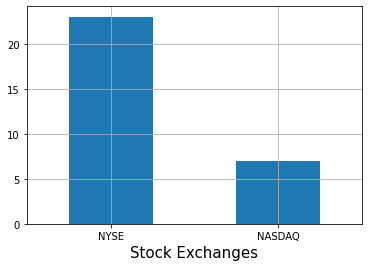

In [9]:
dj30.groupby('exchg')[['ticker']].count().sort_values('ticker', ascending= False). \
    plot(kind='bar', figsize= (6,4), grid= True, legend= False)
plt.xticks(rotation=0)
plt.xlabel('Stock Exchanges', fontsize= 15)
plt.show()

### Check distribution by industries

In [10]:
dj30.groupby('industry')[['ticker']].count().sort_values('ticker', ascending= False)

,ticker
industry,
Information technology,5
Financial services,4
Retailing,2
Pharmaceutical industry,2
Conglomerate,2
Aerospace and defense,1
Home Improvement,1
Semiconductor industry,1
Petroleum industry,1


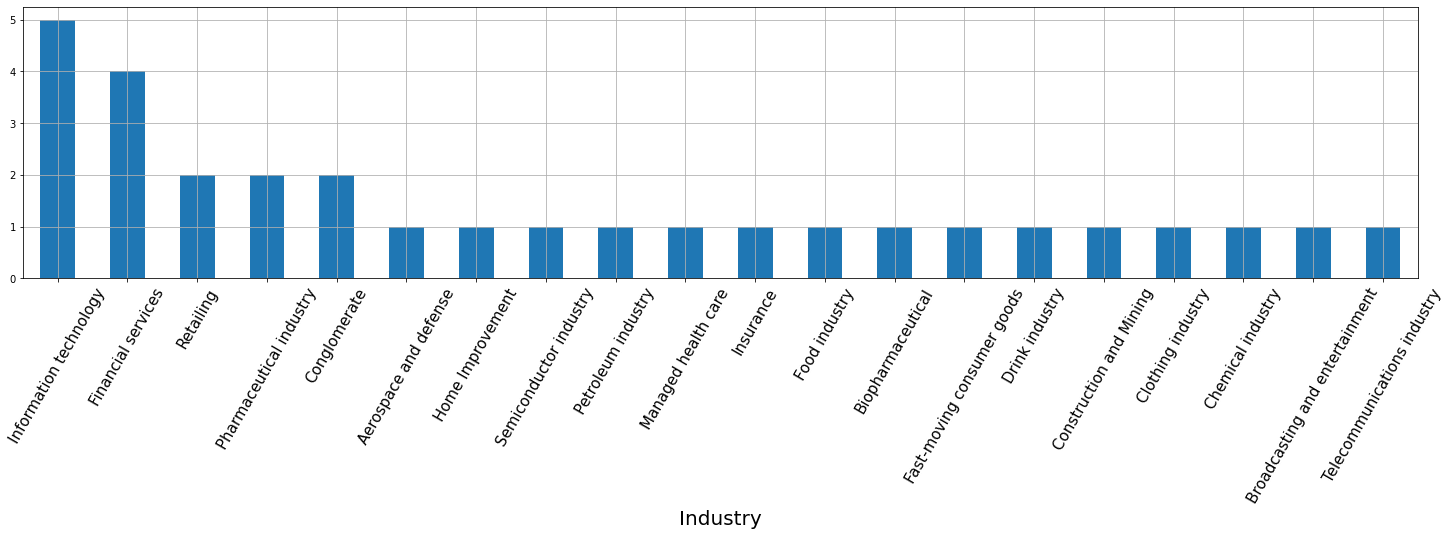

In [11]:
dj30.groupby('industry')[['ticker']].count().sort_values('ticker', ascending= False). \
    plot(kind='bar', figsize= (25,5), grid= True, legend= False)
plt.xticks(rotation=60, fontsize=15)
plt.xlabel('Industry', fontsize= 20)
plt.show()

### Sort by weight

In [12]:
dj30.head()

,name,exchg,ticker,industry,date_added,weight
0,3M,NYSE,MMM,Conglomerate,1976-08-09,2.88
1,American Express,NYSE,AXP,Financial services,1982-08-30,3.56
2,Amgen,NASDAQ,AMGN,Biopharmaceutical,2020-08-31,4.88
3,Apple,NASDAQ,AAPL,Information technology,2015-03-19,3.15
4,Boeing,NYSE,BA,Aerospace and defense,1987-03-12,3.40


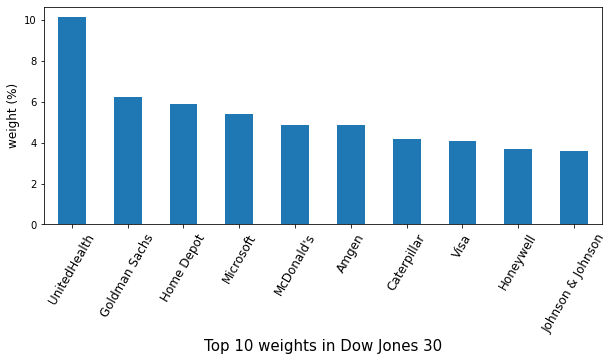

In [13]:
dj30.sort_values('weight', ascending= False).head(10).plot(kind= 'bar', x= 'name', y='weight', legend= False, figsize= (10,4))
plt.xticks(rotation=60, fontsize= 12)
plt.xlabel('Top 10 weights in Dow Jones 30', fontsize= 15)
plt.ylabel('weight (%)', fontsize= 12)
plt.show()

### Sort by date_added

In [14]:
dj30.sort_values('date_added')

,name,exchg,ticker,industry,date_added,weight
22,Procter & Gamble,NYSE,PG,Fast-moving consumer goods,1932-05-26,3.15
0,3M,NYSE,MMM,Conglomerate,1976-08-09,2.88
19,Merck,NYSE,MRK,Pharmaceutical industry,1979-06-29,1.65
14,IBM,NYSE,IBM,Information technology,1979-06-29,2.69
1,American Express,NYSE,AXP,Financial services,1982-08-30,3.56
18,McDonald's,NYSE,MCD,Food industry,1985-10-30,4.89
4,Boeing,NYSE,BA,Aerospace and defense,1987-03-12,3.40
8,Coca-Cola,NYSE,KO,Drink industry,1987-03-12,1.28
5,Caterpillar,NYSE,CAT,Construction and Mining,1991-05-06,4.19
9,Disney,NYSE,DIS,Broadcasting and entertainment,1991-05-06,2.32


---------

## 3. Save as csv

In [15]:
dj30.to_csv('dj30.csv')
dj30.head()

,name,exchg,ticker,industry,date_added,weight
0,3M,NYSE,MMM,Conglomerate,1976-08-09,2.88
1,American Express,NYSE,AXP,Financial services,1982-08-30,3.56
2,Amgen,NASDAQ,AMGN,Biopharmaceutical,2020-08-31,4.88
3,Apple,NASDAQ,AAPL,Information technology,2015-03-19,3.15
4,Boeing,NYSE,BA,Aerospace and defense,1987-03-12,3.40


-------